In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# 1. Data Loading and Preprocessing

In [2]:
try:
    data = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    print("Please make sure the dataset is in the same directory as the script.")
    exit()

In [3]:
features = ['Total day minutes', 'Total eve minutes']
target = 'Churn'

In [4]:
X = data[features]
y = data[target]

In [5]:
y = y.astype(int)

# 2. Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. SVM Model Training

In [8]:
print("Training SVM with Linear Kernel...")
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
print("Linear SVM training complete.")

Training SVM with Linear Kernel...
Linear SVM training complete.


In [9]:
print("\nTraining SVM with RBF Kernel...")
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
print("RBF SVM training complete.")


Training SVM with RBF Kernel...
RBF SVM training complete.


# 5. Model Evaluation

In [10]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates the model on the test set and prints performance metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"AUC Score: {auc:.4f}")
    return y_pred_proba

In [11]:
y_pred_proba_linear = evaluate_model(svm_linear, X_test_scaled, y_test, "Linear SVM")
y_pred_proba_rbf = evaluate_model(svm_rbf, X_test_scaled, y_test, "RBF SVM")


--- Linear SVM Evaluation ---
Accuracy:  0.8582
Precision: 0.0000
Recall:    0.0000
AUC Score: 0.2989

--- RBF SVM Evaluation ---
Accuracy:  0.8731
Precision: 0.6667
Recall:    0.2105
AUC Score: 0.8206


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# 6. Decision Boundary Visualization

In [12]:
def plot_decision_boundary(model, X, y, scaler, title):
    """
    Plots the decision boundary for a trained SVM model.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    handles, _ = scatter.legend_elements()
    legend_labels = ['No Churn', 'Churn']
    plt.legend(handles, legend_labels, title="Classes")

    x_label = features[0]
    y_label = features[1]

    plt.title(title)
    plt.xlabel(f"Scaled {x_label}")
    plt.ylabel(f"Scaled {y_label}")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


Generating decision boundary plots...


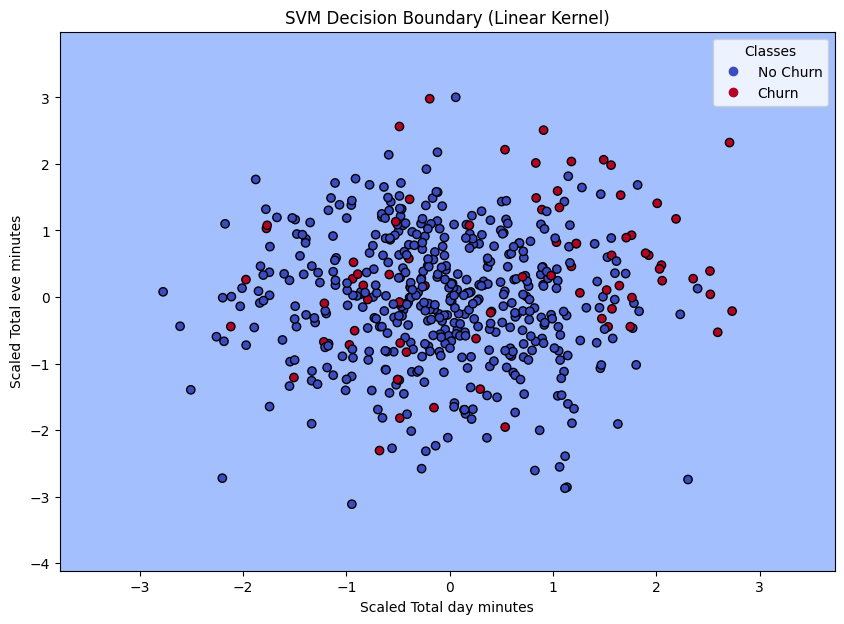

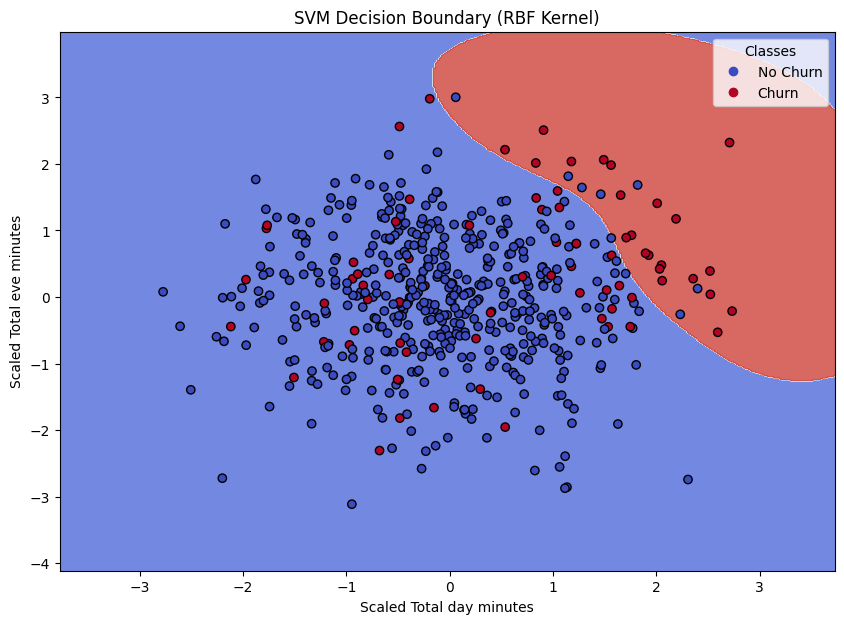

Plot generation complete.


In [13]:
print("\nGenerating decision boundary plots...")
plot_decision_boundary(svm_linear, X_train_scaled, y_train, scaler, 'SVM Decision Boundary (Linear Kernel)')
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, scaler, 'SVM Decision Boundary (RBF Kernel)')
print("Plot generation complete.")

# 7. ROC Curve Comparison

In [14]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

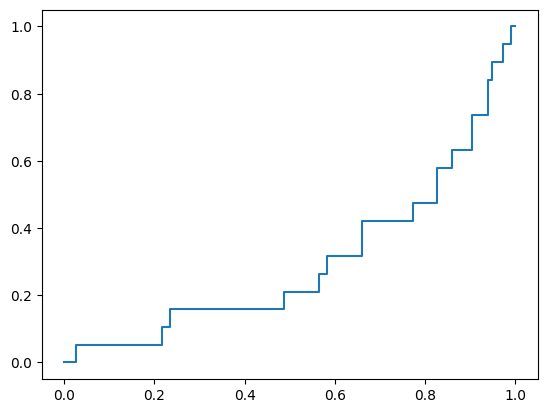

In [15]:
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred_proba_linear)
plt.plot(fpr_linear, tpr_linear, linestyle='-', label=f'Linear SVM (AUC = {roc_auc_score(y_test, y_pred_proba_linear):.2f})')

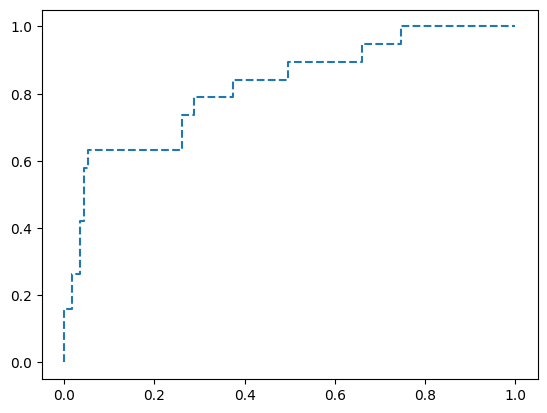

In [16]:
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred_proba_rbf)
plt.plot(fpr_rbf, tpr_rbf, linestyle='--', label=f'RBF SVM (AUC = {roc_auc_score(y_test, y_pred_proba_rbf):.2f})')

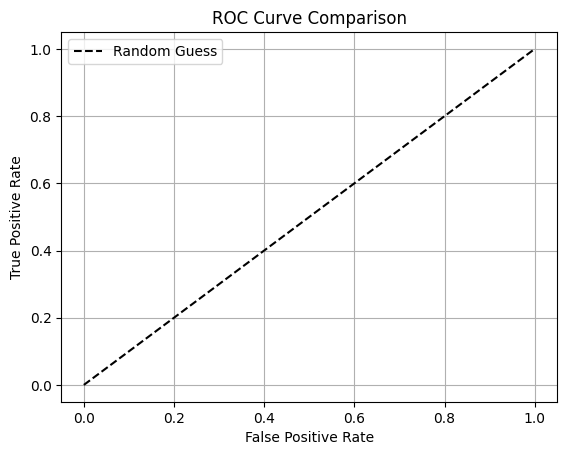

In [17]:
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()